## COMP 4447: Week 7, Python Visualization

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame
import seaborn as sns
from matplotlib import gridspec

In [2]:
%matplotlib inline

In [3]:
available_data = sns.get_dataset_names()

In [4]:
available_data

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
## Seaborn is built on top of matplotlib. We'll see how to integrate these two packages shortly.
## A fundamental part of matplotlib is understanding how to work with the plot objects directly.
## you can perform functional plotting, but the best way to plot is to use the object-oriented approach.

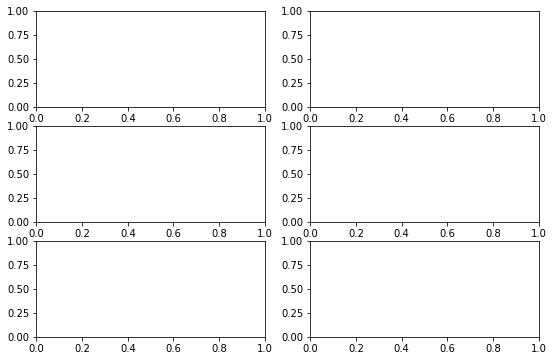

In [6]:
# Let's create a 3,2 subplotting space and pull out the figure and axes objects
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 6), num=1)

In [7]:
# as we might expect, the shape of the axes object is...(3,2)
# we can iterte over the elements of axes with the numpy method ndenumerate.
print(axes.shape)

(3, 2)


In [8]:
for i,j in np.ndenumerate(axes):
    print(i, j)

(0, 0) AxesSubplot(0.125,0.657941;0.352273x0.222059)
(0, 1) AxesSubplot(0.547727,0.657941;0.352273x0.222059)
(1, 0) AxesSubplot(0.125,0.391471;0.352273x0.222059)
(1, 1) AxesSubplot(0.547727,0.391471;0.352273x0.222059)
(2, 0) AxesSubplot(0.125,0.125;0.352273x0.222059)
(2, 1) AxesSubplot(0.547727,0.125;0.352273x0.222059)


In [13]:
# if we want to access specific axes now, we have to use two-dimensional indexing.
# For example:
axes[0, 0]

<AxesSubplot:>

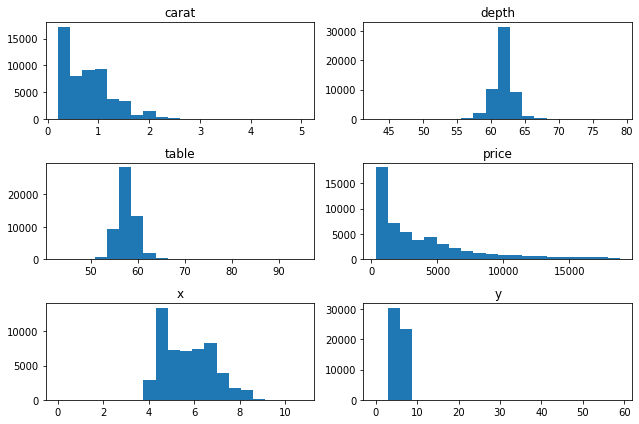

In [15]:
# You can use the numpy method ravel() to flatten out these higher dimensional arrays in order
# to iterate over them more easily.

diamonds = sns.load_dataset('diamonds')
# a list of continous features from the diamonds dataset
measures = ['carat', 'depth', 'table', 'price', 'x', 'y']

fig1, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 6), num=1)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.hist(diamonds[measures[i]], bins=20)
    ax.set_title(measures[i])
plt.tight_layout()

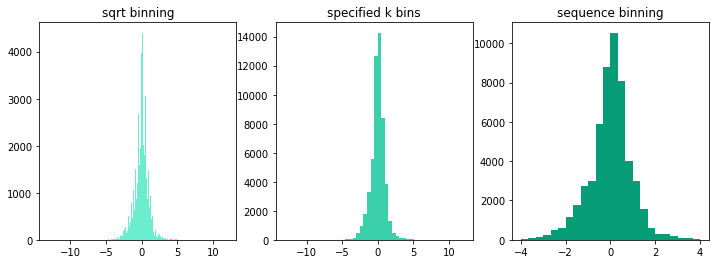

In [18]:
# The above histograms don't look great.  We could improve them with better binning.
# You can define your own binning straegy, or you can utilize one of the built-in methods.
# the bins param takes an int, sequence or string. If you pass a sequence, all but the last bin is half open.

diamonds['depth_norm'] = (diamonds['depth'] - diamonds['depth'].mean()) / diamonds['depth'].std()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].hist(diamonds['depth_norm'],
             bins='sqrt', 
             color='#6dedcf')
#axes[0].set_xlim([-5, 5])
axes[0].set_title('sqrt binning')

axes[1].hist(diamonds['depth_norm'],
             bins=50, 
             color='#3ccfac') # this is the default
#axes[1].set_xlim([-5, 5])
axes[1].set_title('specified k bins')

axes[2].hist(diamonds['depth_norm'],
            bins=np.linspace(-4, 4, 25),
            color='#069c78')
axes[2].set_title('sequence binning')
plt.show()

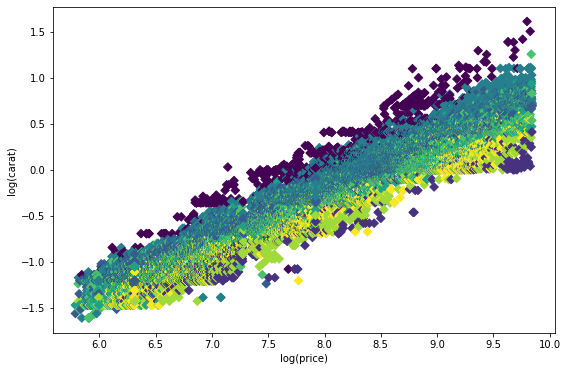

In [19]:
## Let's look at scatterplots in matplotlib

# I'm going to log transform price and carat first to improve normality 
diamonds['price_log'] = np.log(diamonds['price'])
diamonds['carat_log'] = np.log(diamonds['carat'])


# Now we'll scatter the transformed data, using clarity to color the points.
# First we need to encode the categorical clarity values as integers.

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
clarity_int = encoder.fit_transform(diamonds['clarity'])

# Now for the plot
fig, ax = plt.subplots(figsize=(9, 6), num=4)
ax.scatter('price_log', 'carat_log', c=clarity_int, marker='D', data=diamonds)
ax.set_xlabel('log(price)')
ax.set_ylabel('log(carat)')
plt.show()

In [23]:
#### The transformation improved the normality of the data. This is preferable for modeling, 
#### but it's more difficult to interpret the plot. We'll rerun with the raw data.

#### We'll flip x and y as well.  If we want to think of price as a function of carat,
#### then the convention would be to plot price on the y axis.

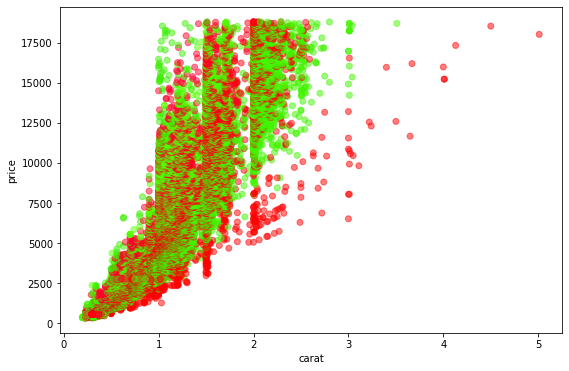

In [24]:
fig, ax = plt.subplots(figsize=(9, 6), num=5)
scatter = ax.scatter('carat', 'price',
                     c=clarity_int,
                     alpha=0.5,
                     cmap='prism',
                     marker='o',
                     data=diamonds)
ax.set_xlabel('carat')
ax.set_ylabel('price')
plt.show()

In [25]:
#### Let's plot two violin plots on the same canvas and have them share a y axis

In [26]:
# first we'll min max scale them so the data are on similar scales
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
p_norm = scaler.fit_transform(diamonds[['price']])
c_norm = scaler.fit_transform(diamonds[['carat']])

Text(0.5, 0.98, 'Some Violin Plots')

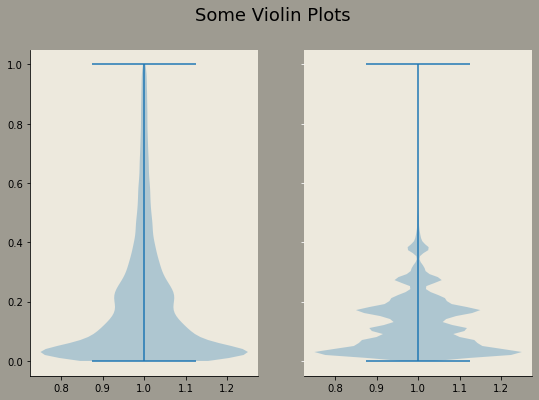

In [27]:
# we'll invoke a bunch of axes methods below....

fig, axes = plt.subplots(1,2, figsize=(9, 6), sharex=False, sharey=True)
fig.set_facecolor('#9e9b91')
axes[0].violinplot(p_norm)
axes[0].spines.right.set_visible(False)
axes[0].spines.top.set_visible(False)
axes[0].set_facecolor('#ede9dd')
axes[1].violinplot(c_norm)
axes[1].spines.right.set_visible(False)
axes[1].spines.top.set_visible(False)
axes[1].set_facecolor('#ede9dd')
axes[1].spines.left.set_visible(False)
axes[1].tick_params(axis='y', colors='white')
fig.suptitle('Some Violin Plots', fontsize=18)

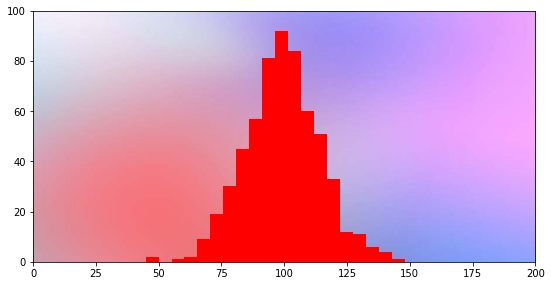

In [32]:
## We can use images in our plots, or just use the functionality to display images.
np.random.seed(51)

x_data = np.random.randn(600) * 15 + 100
img = plt.imread('./wk4/gradient.png')
fix, ax = plt.subplots(figsize=(9,6))
# extent takes horiz min, horiz max, vert min, vert max
ax.imshow(img, extent=[0, 200, 0, 100])
ax.hist(x_data, bins=20, color='r')
plt.show()

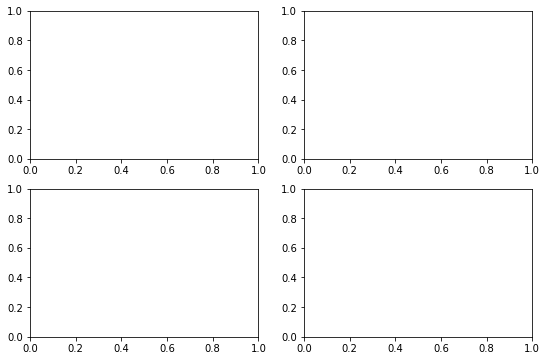

In [33]:
# Grid spec

# here is a basic 2x2 plotting space, notice the uniform sizing of the axes

fig1, axes1 = plt.subplots(2, 2, figsize=(9, 6))

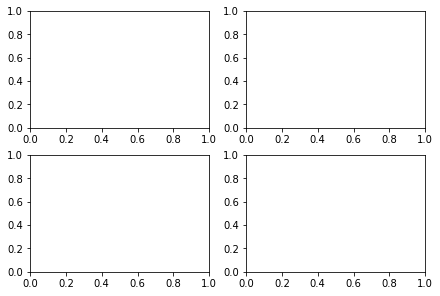

In [36]:
# same as above, but using gridspec

fig2 = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2, 2, figure=fig2)

ax2_1 = fig2.add_subplot(gs[0, 0])
ax2_2 = fig2.add_subplot(gs[0, 1])
ax2_3 = fig2.add_subplot(gs[1, 0])
ax2_4 = fig2.add_subplot(gs[1, 1])

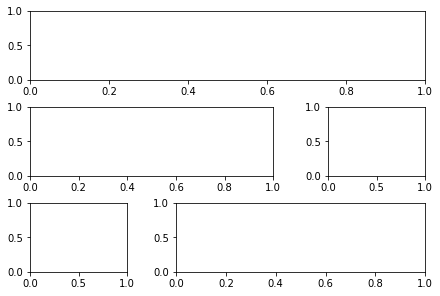

In [37]:
# a more nuanced plotting space

fig3 = plt.figure(constrained_layout=True)

gs = gridspec.GridSpec(3, 3, figure=fig3)

ax3_1 = fig3.add_subplot(gs[0, :])
ax3_2 = fig3.add_subplot(gs[1, :2])
ax3_3 = fig3.add_subplot(gs[1, 2:])
ax3_4 = fig3.add_subplot(gs[2:, :1])
ax3_5 = fig3.add_subplot(gs[2:, 1:])

Text(0.5, 1.0, 'gs[2:, 1:]')

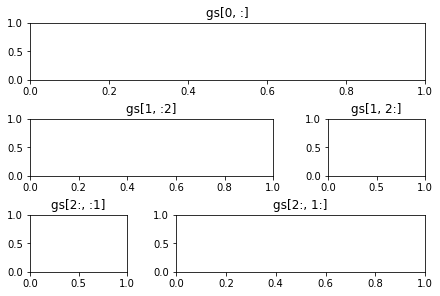

In [38]:
# you can also use the .add_gridspec convenience method instead of importing Gridspec
fig4 = plt.figure(constrained_layout=True)

gs = fig4.add_gridspec(3, 3)

ax4_1 = fig4.add_subplot(gs[0, :])
ax4_1.set_title('gs[0, :]')
ax4_2 = fig4.add_subplot(gs[1, :2])
ax4_2.set_title('gs[1, :2]')
ax4_3 = fig4.add_subplot(gs[1, 2:])
ax4_3.set_title('gs[1, 2:]')
ax4_4 = fig4.add_subplot(gs[2:, :1])
ax4_4.set_title('gs[2:, :1]')
ax4_5 = fig4.add_subplot(gs[2:, 1:])
ax4_5.set_title('gs[2:, 1:]')

In [ ]:
# it can be cumbersome to achieve detailed plots
# in matplotlib, but the good news is that we can substitute our pyplot functions with seaborn plotting functions

## There is a subset of seaborn plotting functions that return matplotlib axes objects,
## so we can use all of our axes-level methods on those objects.

In [41]:
sns.set_style('white')
# sns.reset_orig() can be used to rest to original params

__figure-level vs axes-level functions__

It's useful to review the documentation on this concept.
This will help you fully incorporate seaborn plotting
with matplotlib object-oriented approaches.

Each seaborn plotting module has a top-level figure-level function.
Figure-level functions interface with matplotlib through a seaborn object.  Axes-level functions return a pyplot.Axes object.

Figure-level functions can produce their assoicated axes-level plots by sepcifying the 'kind' paramater.  There are advantages and disadvangages to both.

Axes-level plots are easy to use and are matplotlib objects, so they're simple to incorporate with other matplotlib functionality.

<class 'matplotlib.axes._subplots.AxesSubplot'>


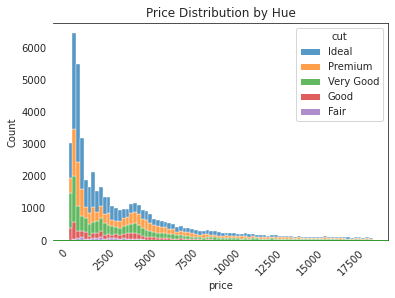

In [42]:
# histplot() is axes-level function
hist = sns.histplot(data=diamonds, x='price', hue='cut', multiple='stack')

print(type(hist))

# we can employ any of the pyplot axes methods on our Seaborn axes-level plots.
hist.set_title('Price Distribution by Hue', fontsize=12)
plt.xticks(rotation=45)
hist.spines.left.set_visible(False)
hist.spines.bottom.set_color('green')
fig.suptitle('DIAMONDS', fontsize=14)
plt.show()

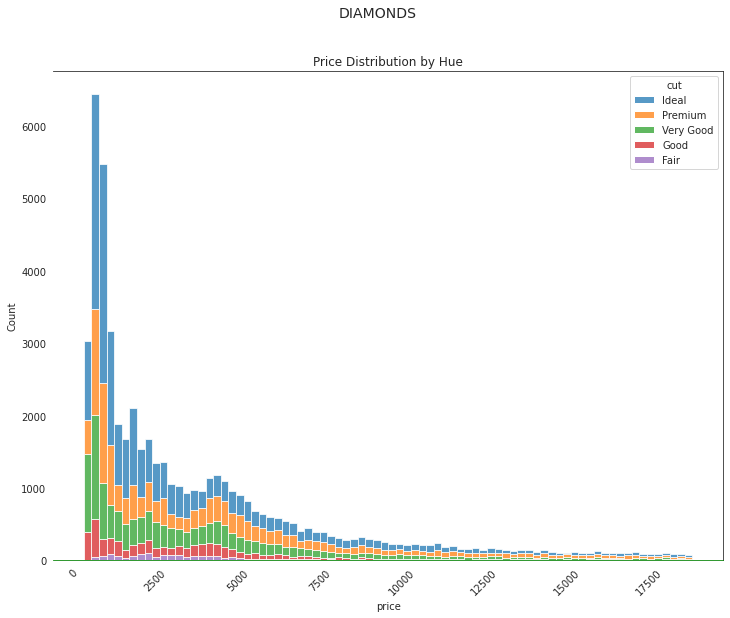

In [48]:
# The above plot can be added to a matplotlib a subplot space using the available ax parameter

fig, ax = plt.subplots(figsize=(12,9 ))

sns.histplot(data=diamonds,
             x='price', 
             hue='cut', 
             multiple='stack',
             ax=ax)

ax.set_title('Price Distribution by Hue', fontsize=12)
plt.xticks(rotation=45)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_color('green')

fig.suptitle('DIAMONDS', fontsize=14)

plt.show()

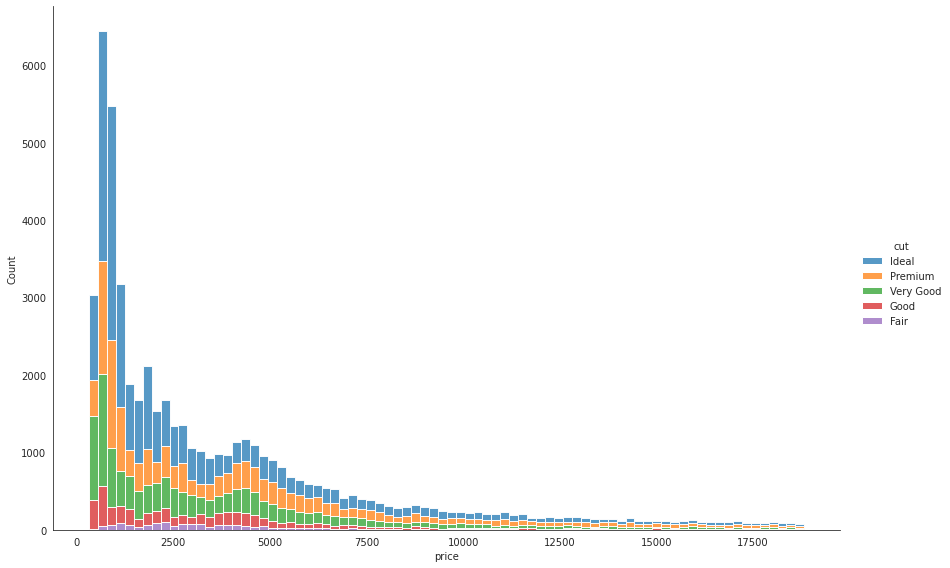

In [52]:
# displot() is fig-level
sns.displot(data=diamonds, x='price', hue='cut', multiple='stack', kind='hist',
           height=8, aspect=1.5)

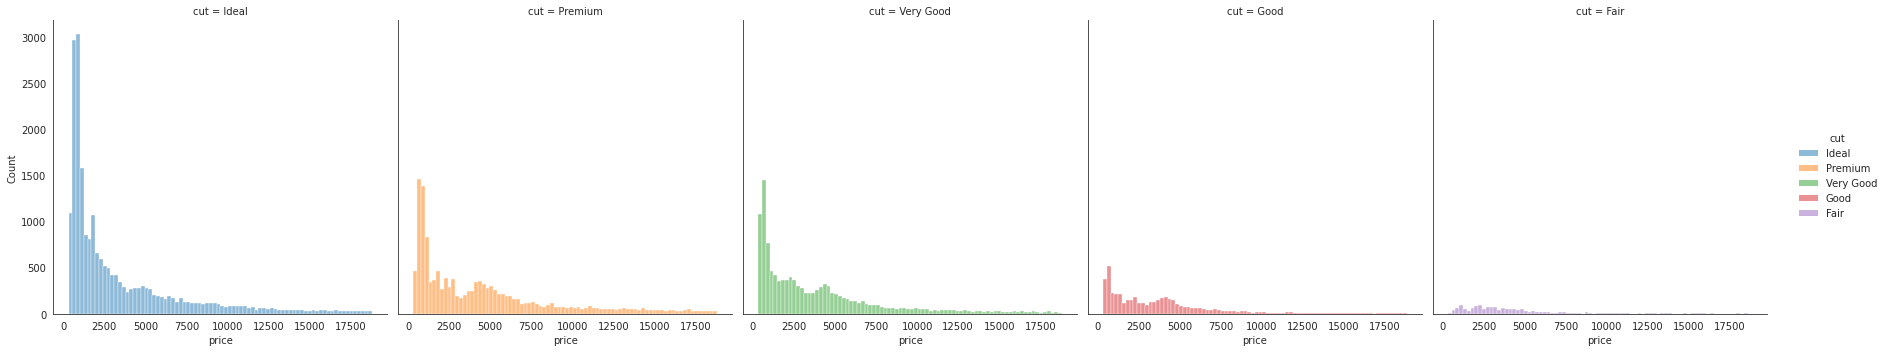

In [54]:
# seaborn also offers facet grid functionality.  Facet grids are a seborn object.
# We can create facet grids independently or facet directly from figure-level function calls.
# Below we use the figure-level method and facet the plots by cut.
# Note that these plots can't be added to a matplotlib axes object.

sns.displot(data=diamonds, x='price', hue='cut', kind='hist', col='cut')

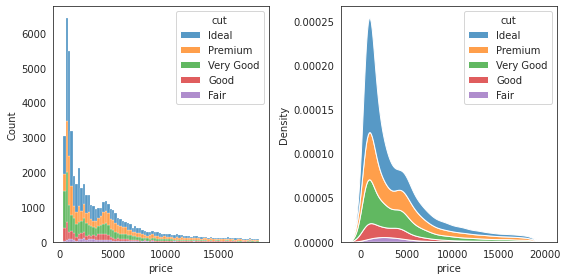

In [55]:
# By incorporating seaborn and matplotlib we get the additional abstraction from seaborn 
# as well as the high level of control offered through matplotlib.

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=diamonds, x='price', hue='cut', multiple='stack', ax=axes[0])
sns.kdeplot(data=diamonds, x='price', hue='cut', multiple='stack', ax=axes[1])
plt.tight_layout()

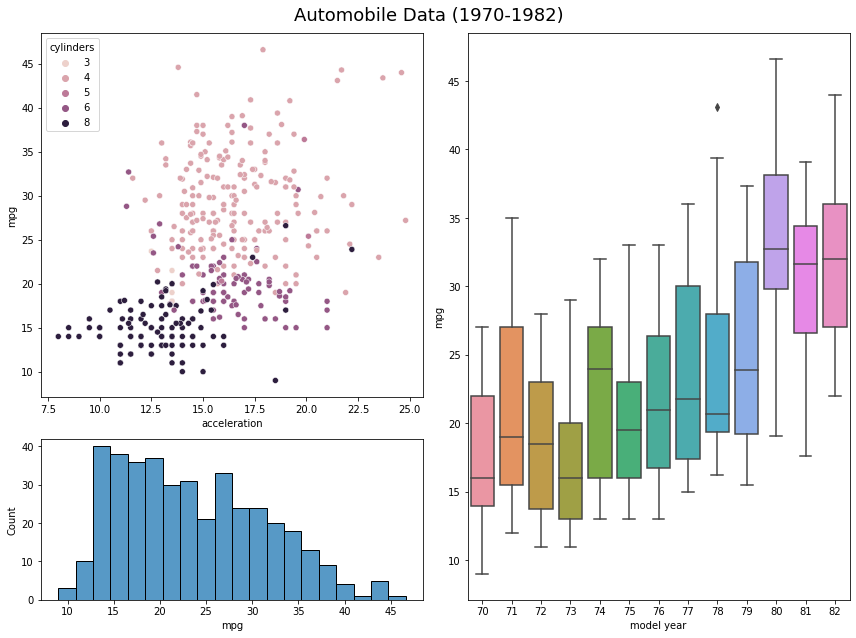

In [11]:
mpg = sns.load_dataset('mpg')

fig = plt.figure(figsize=(12, 9))

gs = fig.add_gridspec(3, 4)
ax0 = plt.subplot(gs[:2, :2])
ax1 = plt.subplot(gs[2:, :2])
ax2 = plt.subplot(gs[:3, 2:])

sns.scatterplot(data=mpg, x='acceleration',
                y='mpg', hue='cylinders',
                ax=ax0)

sns.histplot(data=mpg, x='mpg', bins=20,
             ax=ax1)

sns.boxplot(data=mpg, x='model_year', y='mpg',
            ax=ax2)

ax2.set_xlabel('model year')

fig.suptitle('Automobile Data (1970-1982)', fontsize=18)
plt.tight_layout()

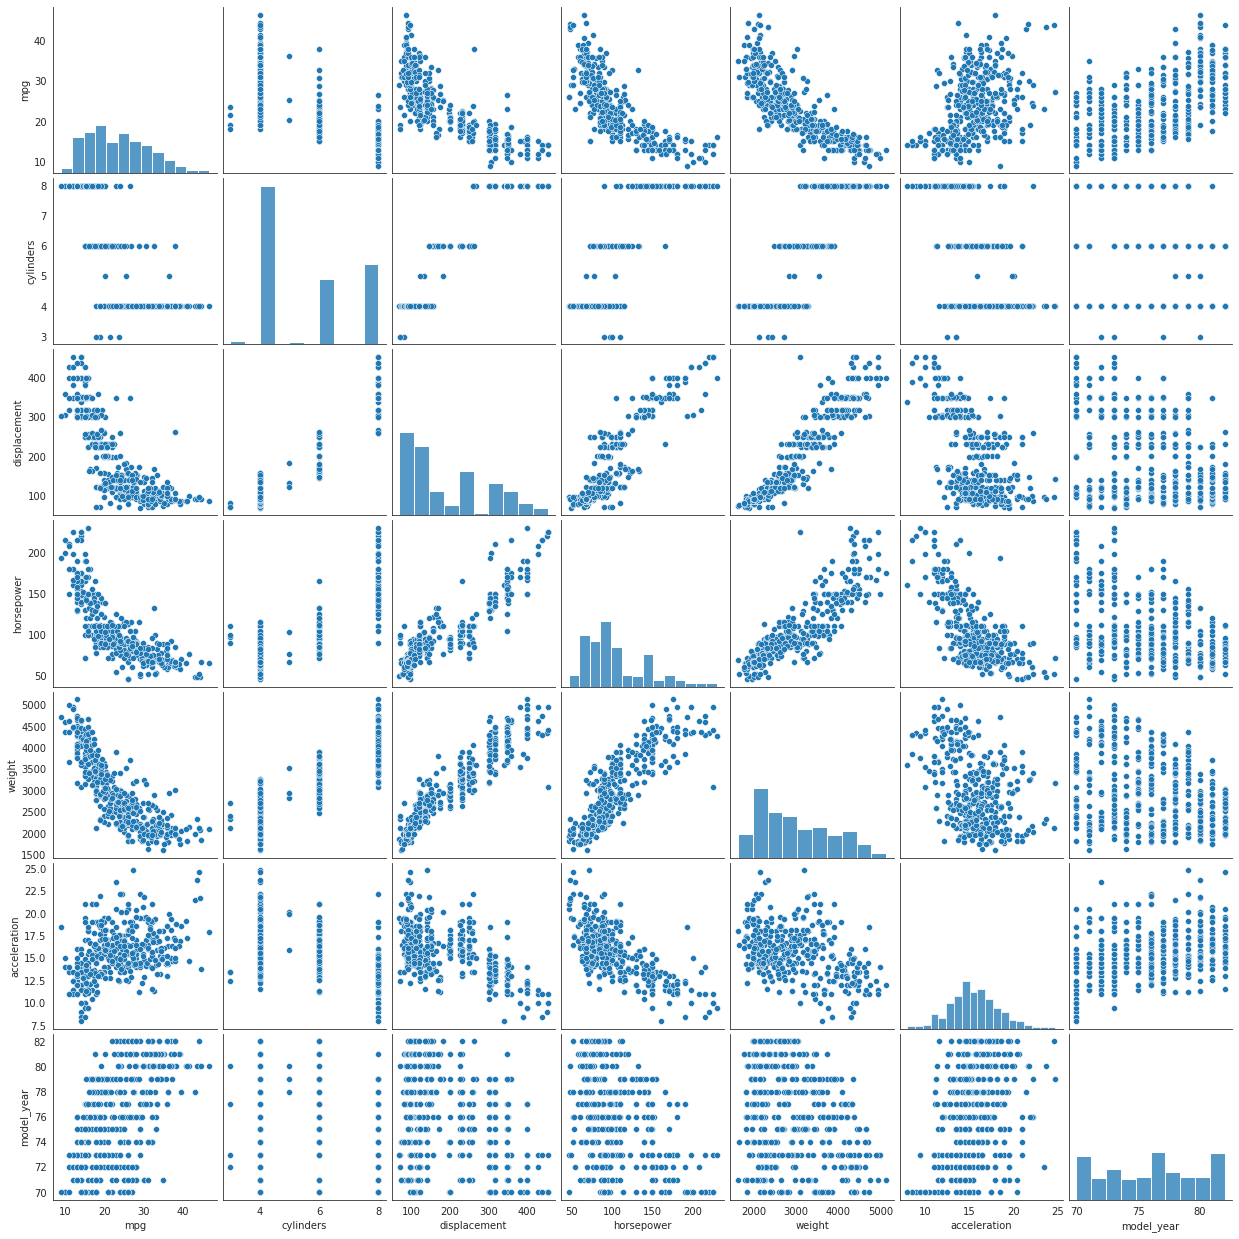

In [58]:
# pairplot is a super convenient way tto explore your data
sns.pairplot(mpg)

## Pandas Plotting

We can invoke plotting methods directly on pandas objects as well, althogh you lose a bit of control.
By default pandas uses matplotlib as the plotting backend.

In [19]:
for col in mpg.columns:
    print(col)

mpg
cylinders
displacement
horsepower
weight
acceleration
model_year
origin
name


In [20]:
mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [21]:
mpg.groupby('origin')['mpg'].apply(np.mean)

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

<AxesSubplot:xlabel='origin'>

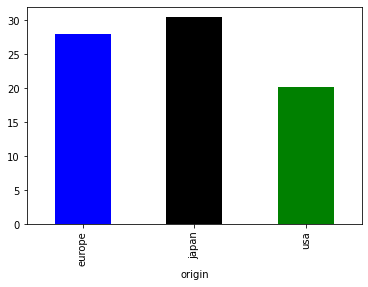

In [25]:
colors = ['blue', 'black', 'green']

mpg.groupby('origin')['mpg'].apply(np.mean).plot.bar(color=colors)

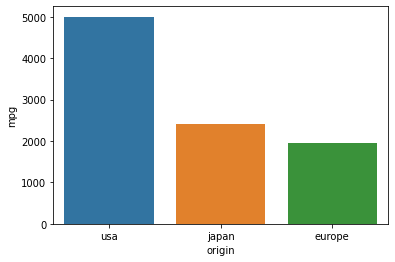

In [31]:
# When visualizing, data aggregation is paramount.
# We can sometimes pass aggregation arguments through plotting functions,
# other times we have to restructure our data more manually.

# here this estimator doesn't make much sense...it's just a function of the 
# number of different cars produced.

bar = sns.barplot(data=mpg,
                 x='origin',
                 y='mpg',
                 estimator=sum,
                 ci=None)

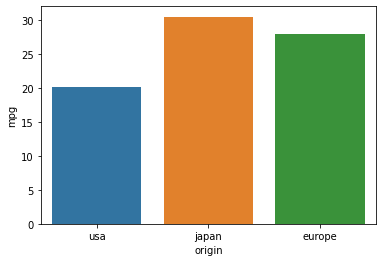

In [32]:
# this makes more sense

bar = sns.barplot(data=mpg,
                 x='origin',
                 y='mpg',
                 estimator=np.mean,
                 ci=None)

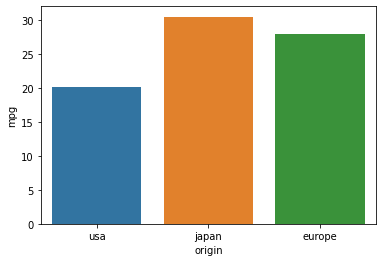

In [33]:
# passing a lambda to aggregate.

bar = sns.barplot(data=mpg,
                 x='origin',
                 y='mpg',
                 estimator=lambda x: sum(x)/len(x),
                 ci=None)

In [50]:
# passing parallel lists
nation = []
avg_mpg = []

for i in mpg['origin'].unique():
    nation.append(i)
    avg_mpg.append(np.mean(mpg.loc[mpg['origin'] == i, 'mpg']))

<BarContainer object of 3 artists>

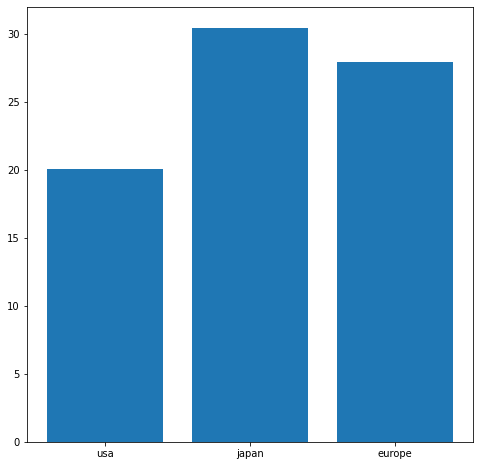

In [51]:
fig, ax = plt.subplots(figsize=(8,8))

ax.bar(nation, avg_mpg)

In [54]:
# if we want sorted bars, then we need to pass in sorted data

zipped = zip(avg_mpg, nation)
zipped_s = sorted(zipped, reverse=True)

tuples = zip(*zipped_s)

avg_mpg, nation = [list(tup) for tup in tuples]

<BarContainer object of 3 artists>

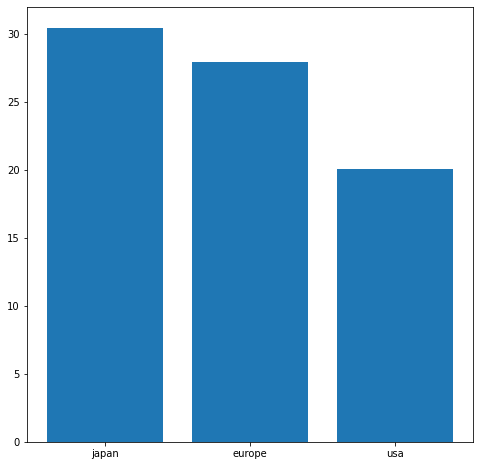

In [55]:
fig, ax = plt.subplots(figsize=(8,8))

ax.bar(nation, avg_mpg)